##Домашнее задание № 2. Элементарные методы анализа временных рядов.

##Загрузим необходимые данные

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox

In [2]:
from pylab import rcParams

import seaborn as sns

import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-17 06:03:22--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip’

1._Лекция_tsml.zip  100%[===================>] 751.03K  2.52MB/s    in 0.3s    

2025-02-17 06:03:23 (2.52 MB/s) - ‘1._Лекция_tsml.zip’ saved [769056/769056]



In [4]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

В качестве ряда для анализа выберу monthly_boston_armed_robberies_j. Он мне кажется самым интересным.

In [5]:
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')

In [22]:
series = monthly_boston_armed_robberies_j

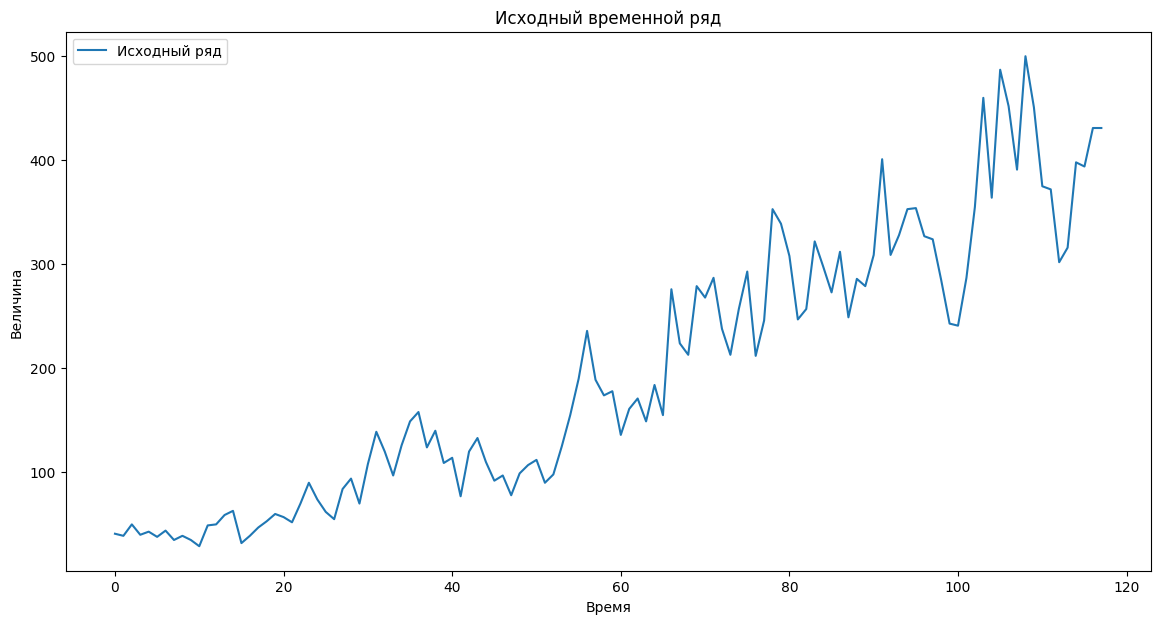

In [23]:
# еще раз на него посмотрим
plt.figure(figsize=(14, 7))
plt.plot(series['Count'], label='Исходный ряд')
#plt.plot(rolling_mean, label='Скользящее среднее', color='red')
#plt.plot(detrended, label='Detrended', color='green')
plt.title('Исходный временной ряд')
plt.xlabel('Время')
plt.ylabel('Величина')
plt.grid(False)
plt.legend()
plt.show()

Рассчитаем Стандартизованную оценку (Z-Score) для каждого наблюдения, то есть меру удаленности от Среднего значения (Mean)

In [24]:
series['Standardized_assessment'] = (series['Count'] -
                                     series['Count'].mean()) / series['Count'].std(ddof=0)
series.head()

,Month,Count,Standardized_assessment
0,1966-01,41,-1.217947
1,1966-02,39,-1.233633
2,1966-03,50,-1.147359
3,1966-04,40,-1.225790
4,1966-05,43,-1.202261


In [25]:
# разложим временной ряд на компоненты
decompose_result = seasonal_decompose(series['Count'], model='multiplicative')
decompose_result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None